In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Reading the train set
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Exploring the data by:
* Age.
* Gender.
* Class

# 1.1 Age


In [3]:
# Age
Survivor_Age = train_data.loc[train_data.Survived == 1]["Age"]
Survivor_Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
Death_Age = train_data.loc[train_data.Survived == 0]["Age"]
Death_Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

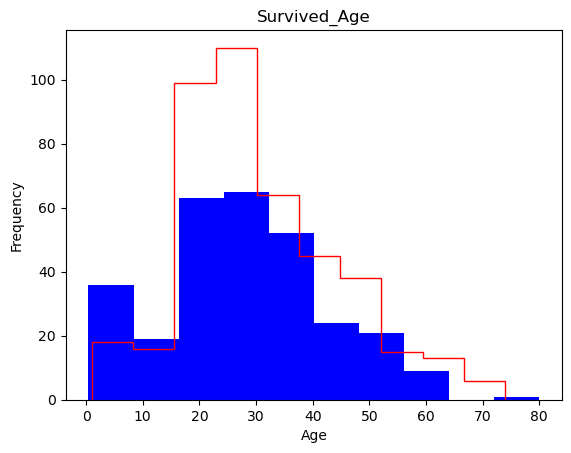

In [5]:
# For ghapics
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


n, bins, patches = plt.hist(Survivor_Age, color= 'blue')
n, bins, patches = plt.hist(Death_Age, color= "red", histtype="step")
plt.title("Survived_Age")
plt.xlabel("Age")
plt.ylabel("Frequency")



# 1.2 Gender

In [6]:
# By gender
women_DS = train_data.loc[train_data.Sex == "female"][["Survived","Age"]]
women_DS.describe()


,Survived,Age
count,314.000000,261.000000
mean,0.742038,27.915709
std,0.438211,14.110146
min,0.000000,0.750000
25%,0.000000,18.000000
50%,1.000000,27.000000
75%,1.000000,37.000000
max,1.000000,63.000000


In [7]:
men_DS = train_data.loc[train_data.Sex == "male"][["Survived", "Age"]]
men_DS.describe()

,Survived,Age
count,577.000000,453.000000
mean,0.188908,30.726645
std,0.391775,14.678201
min,0.000000,0.420000
25%,0.000000,21.000000
50%,0.000000,29.000000
75%,0.000000,39.000000
max,1.000000,80.000000


# 1.3 Class

In [8]:
# By tiket class 
First_class = train_data.loc[train_data.Pclass == 1][["Pclass","Survived","Age","Sex","PassengerId"]]
First_class.describe()

,Pclass,Survived,Age,PassengerId
count,216.0,216.000000,186.000000,216.000000
mean,1.0,0.629630,38.233441,461.597222
std,0.0,0.484026,14.802856,246.737616
min,1.0,0.000000,0.920000,2.000000
25%,1.0,0.000000,27.000000,270.750000
50%,1.0,1.000000,37.000000,472.000000
75%,1.0,1.000000,49.000000,670.500000
max,1.0,1.000000,80.000000,890.000000


In [9]:
First_class.head(20)

,Pclass,Survived,Age,Sex,PassengerId
1,1,1,38.0,female,2
3,1,1,35.0,female,4
6,1,0,54.0,male,7
11,1,1,58.0,female,12
23,1,1,28.0,male,24
27,1,0,19.0,male,28
30,1,0,40.0,male,31
31,1,1,NaN,female,32
34,1,0,28.0,male,35
35,1,0,42.0,male,36


In [10]:
Second_class = train_data.loc[train_data.Pclass == 2][["Pclass","Survived","Age","Sex","PassengerId"]]
Second_class.head()

,Pclass,Survived,Age,Sex,PassengerId
9,2,1,14.0,female,10
15,2,1,55.0,female,16
17,2,1,NaN,male,18
20,2,0,35.0,male,21
21,2,1,34.0,male,22


In [11]:
Third_class = train_data.loc[train_data.Pclass == 3][["Pclass","Survived","Age","Sex", "PassengerId"]]
Third_class.describe()


,Pclass,Survived,Age,PassengerId
count,491.0,491.000000,355.000000,491.000000
mean,3.0,0.242363,25.140620,439.154786
std,0.0,0.428949,12.495398,264.441453
min,3.0,0.000000,0.420000,1.000000
25%,3.0,0.000000,18.000000,200.000000
50%,3.0,0.000000,24.000000,432.000000
75%,3.0,0.000000,32.000000,666.500000
max,3.0,1.000000,74.000000,891.000000


# Modeling
Now that I've some notion of the main factors that affect the behavior of survived passengers data, it's time for the modeling part.


* The training and test sets have missing values in Age, that can be filled with the mean values of the ages by tiket class.

1. For first class

In [12]:
#Show how many NaN are in the First_class DF
First_class.isnull().sum()

Pclass          0
Survived        0
Age            30
Sex             0
PassengerId     0
dtype: int64

In [13]:
# Filling in the null's with the average age per class.
train_c1 = First_class.fillna(First_class.Age.median())
train_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 889
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       216 non-null    int64  
 1   Survived     216 non-null    int64  
 2   Age          216 non-null    float64
 3   Sex          216 non-null    object 
 4   PassengerId  216 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 10.1+ KB


In [14]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_c1 = test_data.loc[test_data.Pclass == 1][["Pclass","Age","Sex","PassengerId"]]
test_c1.isna().sum()

Pclass         0
Age            9
Sex            0
PassengerId    0
dtype: int64

In [15]:
test_c1_noNull= test_c1.fillna(First_class.Age.median())

2. For the Second Class 

In [16]:
Second_class.isnull().sum()

Pclass          0
Survived        0
Age            11
Sex             0
PassengerId     0
dtype: int64

In [17]:
train_c2 = Second_class.fillna(Second_class.Age.median())


In [18]:
test_c2 = test_data.loc[test_data.Pclass == 2][["Pclass","Age","Sex","PassengerId"]]
test_c2.isna().sum()

Pclass         0
Age            5
Sex            0
PassengerId    0
dtype: int64

In [19]:
test_c2_noNull= test_c2.fillna(Second_class.Age.median())

3. For Third class 

In [20]:
Third_class.isnull().sum()

Pclass           0
Survived         0
Age            136
Sex              0
PassengerId      0
dtype: int64

In [21]:
train_c3 = Third_class.fillna(Third_class.Age.median())

In [22]:
test_c3 = test_data.loc[test_data.Pclass == 3][["Pclass","Age","Sex","PassengerId"]]
test_c3.isna().sum()

Pclass          0
Age            72
Sex             0
PassengerId     0
dtype: int64

In [23]:
test_c3_noNull= test_c3.fillna(Third_class.Age.median())
test_c3_noNull.head()

,Pclass,Age,Sex,PassengerId
0,3,34.5,male,892
1,3,47.0,female,893
3,3,27.0,male,895
4,3,22.0,female,896
5,3,14.0,male,897


Joining the data into a single data frame


In [24]:
train_df = pd.concat([train_c1, train_c2 ,train_c3],axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   Sex          891 non-null    object 
 4   PassengerId  891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 41.8+ KB


In [25]:
test_df = pd.concat([test_c1_noNull, test_c2_noNull, test_c3_noNull],axis=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 11 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   Sex          418 non-null    object 
 3   PassengerId  418 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 16.3+ KB


**Now is time to modeling!**

In [26]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "Age"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Your submission was successfully saved!
